# **Proyek Analisis Data: Bike Sharing Dataset**
- Nama: Renaldi Panji Wibowo
- Email: r1815025079@gmail.com
- Id Dicoding: -

## **Merumuskan Pertanyaan Bisnis**

* Pada jam berapakah penyewaan sepeda mencapai jumlah tertinggi dan terendah ?
* Di musim apakah jumlah penyewaan sepeda paling tinggi ?
* Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir ?
* Berapa banyak orang yang memilih menjadi pelanggan terdaftar dibandingkan dengan pengguna kasual ?



## **Menyiapkan library-library yang diperlukan**

In [1]:
# memanggil semua library yang diperlukan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Data Wrangling**

### **1.1 Gathering Data**

In [2]:
# Memuat tabel day
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat tabel hour
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **1.2 Assessing Data**

In [4]:
# memeriksa tipe data dari tiap kolom yang terdapat dalam hour_df dan day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [5]:
# memeriksa adanya missing value dalam dataset `hour_df`
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# memeriksa adanya missing value dalam dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

>**Note :** Pada pengecekan missing value diatas tidak ditemukan missing value di dataframe hour_df dan day_df

In [7]:
# memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0
Jumlah duplikasi:  0


>**Note :** Setelah pengecekan duplikasi data, juga tidak ditemukan data yang terduplikasi

In [8]:
# memeriksa parameter statistik dari kolom numerik dalam dataset day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# memeriksa parameter statistik dari kolom numerik dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### **1.3 Cleaning Data**

Pada sesi ini kita akan melakukan pembersihan data, ada beberapa hal yang dilakukan sebagai berikut :

* Menghapus kolom `instant` dan `workingday`. Menurut saya, kolom `workingday` sudah diwakili oleh `weekday`, dan kolom `instant` tidak memiliki relevansi.
* Selanjutnya, mengubah tipe data `int` menjadi `category` pada kolom `season`, `mnth`, `holiday`, `weekday`, dan `weathersit`, karena kolom-kolom ini berisi data dengan beberapa varian. **Data kategori adalah informasi yang dikelompokkan berdasarkan kategori atau kelompok tertentu**.
* Kita akan menangani tipe data `dteday`, mengonversinya dari `object` menjadi `datetime`.
* Mengganti nama kolom agar lebih mudah dipahami.
* Mengonversi isi kolom sehingga lebih mudah dimengerti.
* Menambahkan kolom baru bernama `category_days` yang menunjukkan apakah hari tersebut merupakan akhir pekan atau hari kerja.



#### **1.3.1 Dropping**

In [10]:
# menghapus kolom instant dan workingday
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)


#### **1.3.2 Mengubah Tipe Data**

##### **int to category**

In [11]:
# mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")


##### **object to datetime**

In [12]:
# menghandling tipe data dteday yang sebelumnya 'object' akan diubah menjadi 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


#### **1.3.3 Rename**

##### **Mengganti nama kolom agar lebih mudah dipahami pada dataset**

In [13]:
# Mengganti nama kolom agar lebih mudah dipahami pada dataset day_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [14]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

##### **Mengkonversi beberapa isi kolom agar mudah dipahami**

In [15]:
# Mengkonversi isi kolom agar mudah dipahami
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Menghitung Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100


C:\Users\user\AppData\Local\Temp\ipykernel_18252\2008606512.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18252\2008606512.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.se

#### **Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays**

In [16]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [17]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

## **2. Exploratory Data Analysis (EDA)**

### **2.1 Explore Data hour_df**


In [18]:
# melihat rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jul,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


>**Note :** Berdasarkan ringkasan parameter statistik di atas, kita mendapatkan informasi bahwa jumlah pelanggan adalah 17,379 orang. Berdasarkan data yang disajikan, rentang waktu berkisar antara pukul 00.00 hingga 23.59, dengan rata-rata penyewaan sepeda terjadi pada pukul 11.54 dan standar deviasi sebesar 6.91.

In [19]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


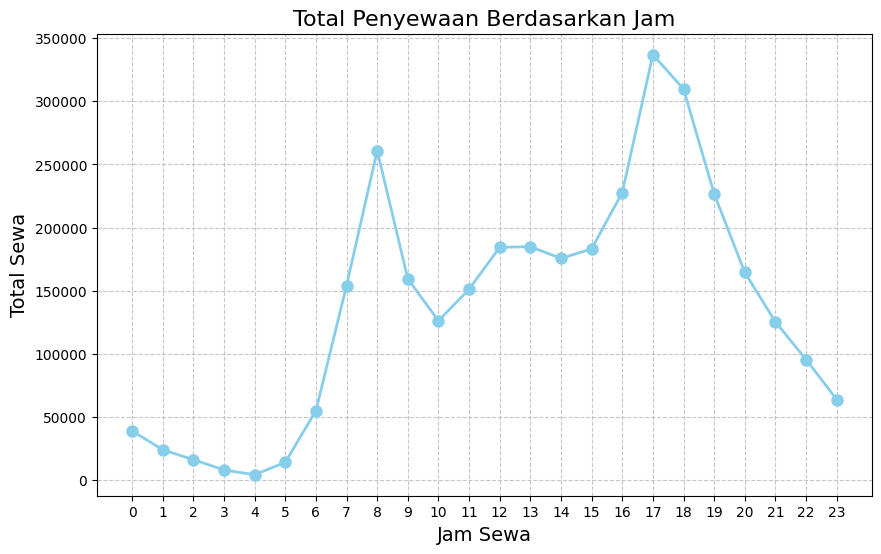

In [20]:
# Mengelompokkan data dan menjumlahkan count_cr
agg_df = hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
}).reset_index()

# Mengambil jam dan total sewa
hours = agg_df['hours']
total_counts = agg_df['count_cr']['sum']

# Membuat plot garis
plt.figure(figsize=(10, 6))
plt.plot(hours, total_counts, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Jam Sewa', fontsize=14)
plt.ylabel('Total Sewa', fontsize=14)
plt.title('Total Penyewaan Berdasarkan Jam', fontsize=16)
plt.xticks(hours)  # Menampilkan setiap jam di sumbu x
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

>**Note :** Dari visualisasi data di atas, dapat dilihat bahwa jumlah penyewaan sepeda tertinggi terjadi pada pukul 17.00, menunjukkan bahwa jam tersebut menjadi waktu favorit pelanggan untuk menyewa sepeda. Sebaliknya, waktu penyewaan terendah terjadi pada pukul 04.00, saat permintaan sepeda sangat minim. Hal ini menggambarkan tren penggunaan sepeda yang lebih tinggi pada sore hari dibandingkan dini hari.

### **2.2 Explore Data day_df**

In [21]:
# melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


>**Note :** Berdasarkan ringkasan dari parameter statistik yang telah dianalisis, kita menemukan bahwa jumlah pelanggan yang terdata selama musim 1 hingga 4 mencapai total 17.379 orang

In [22]:
# melihat jumlah penyewaan tiap season
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_18252\615433780.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


C:\Users\user\AppData\Local\Temp\ipykernel_18252\1164735981.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_summary = day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index()


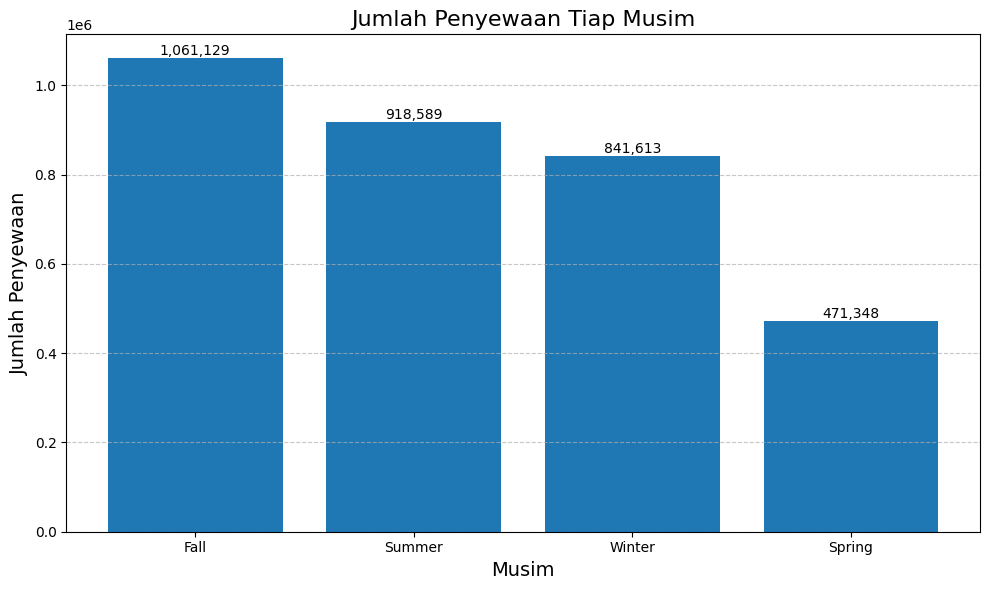

In [23]:
# Mengelompokkan dan menjumlahkan jumlah penyewaan per musim
season_summary = day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index()

# Membuat plot batang
plt.figure(figsize=(10, 6))
plt.bar(season_summary['season'], season_summary['count_cr'])
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.title('Jumlah Penyewaan Tiap Musim', fontsize=16)
plt.xticks(season_summary['season'])  # Menampilkan setiap musim di sumbu x
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai pada batang
for index, value in enumerate(season_summary['count_cr']):
    plt.text(index, value, f'{value:,}', ha='center', va='bottom', fontsize=10)

# Menampilkan plot
plt.tight_layout()  # Mengatur layout agar lebih rapi
plt.show()

> **Note** : Berdasarkan data penyewaan per musim, musim **Fall** mencatat jumlah penyewaan tertinggi dengan **1.061.129 transaksi**, menunjukkan popularitasnya di kalangan pelanggan. Diikuti oleh **Summer** dengan **918.589 penyewaan**, dan **Winter** yang mencapai **841.613 penyewaan**, sementara **Spring** memiliki jumlah terendah, yaitu **471.348 penyewaan**.

In [24]:
# melihat jumlah penyewaan tiap tahun berdasarkan registered dan casul
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


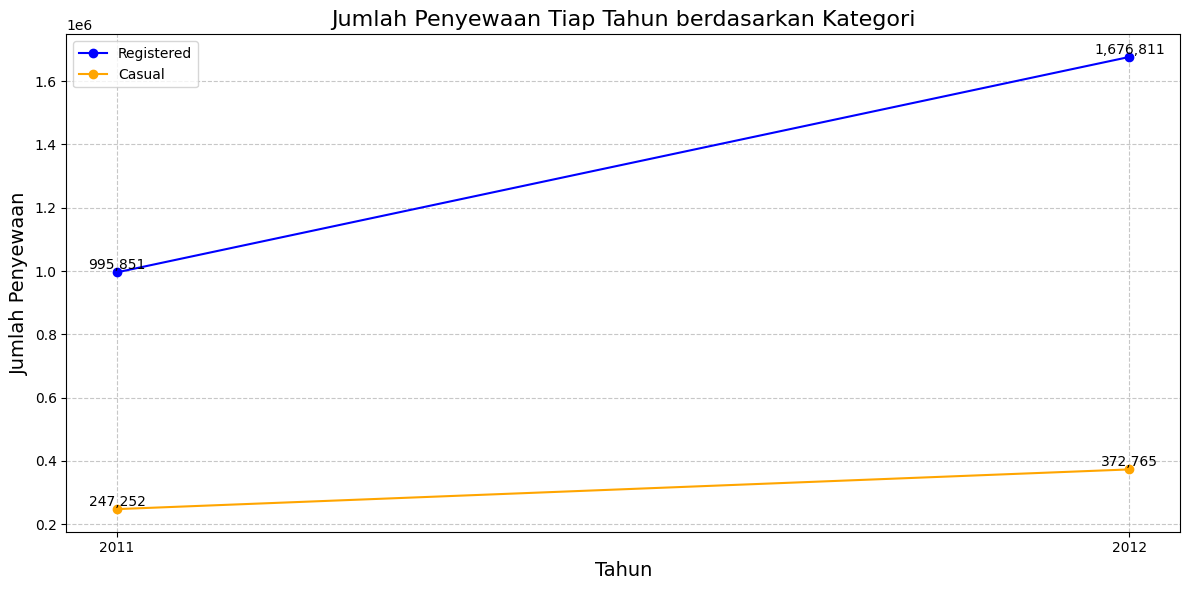

In [25]:
# Mengelompokkan dan menjumlahkan jumlah penyewaan berdasarkan tahun untuk registered dan casual
yearly_summary = day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
}).reset_index()

# Menyiapkan data untuk visualisasi
years = yearly_summary['year']
registered_counts = yearly_summary['registered']['sum']
casual_counts = yearly_summary['casual']['sum']

# Membuat plot
plt.figure(figsize=(12, 6))
plt.plot(years, registered_counts, marker='o', color='blue', label='Registered', linestyle='-')
plt.plot(years, casual_counts, marker='o', color='orange', label='Casual', linestyle='-')
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.title('Jumlah Penyewaan Tiap Tahun berdasarkan Kategori', fontsize=16)
plt.xticks(years)  # Menampilkan setiap tahun di sumbu x
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()  # Menambahkan legend untuk membedakan kategori

# Menampilkan nilai pada titik
for i in range(len(years)):
    plt.text(years[i], registered_counts[i], f'{registered_counts[i]:,}', ha='center', va='bottom', fontsize=10)
    plt.text(years[i], casual_counts[i], f'{casual_counts[i]:,}', ha='center', va='bottom', fontsize=10)

# Menampilkan plot
plt.tight_layout()  # Mengatur layout agar lebih rapi
plt.show()

> **Note :** Berdasarkan gambar di atas, terdapat perbedaan yang signifikan antara jumlah individu yang telah menjadi anggota dan yang belum. Pada tahun 2011, jumlah anggota mencapai **995.851**, sedangkan jumlah yang belum menjadi anggota hanya **247.252**.

## **3. Visualization & Explanatory Analysis**

* Pada jam berapakah penyewaan sepeda mencapai jumlah tertinggi dan terendah ?
* Di musim apakah jumlah penyewaan sepeda paling tinggi ?
* Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir ?
* Berapa banyak orang yang memilih menjadi pelanggan terdaftar dibandingkan dengan pengguna kasual ?

## **Pertanyaan 1 :** <br>

###**Pada jam berapakah penyewaan sepeda mencapai jumlah tertinggi dan terendah ?**

In [26]:
# melakukan grouping terhadap hours dan count_cr
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_18252\3886530695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=top_rentals, palette="Blues", ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_18252\3886530695.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=least_rentals, palette="Reds", ax=ax[1])


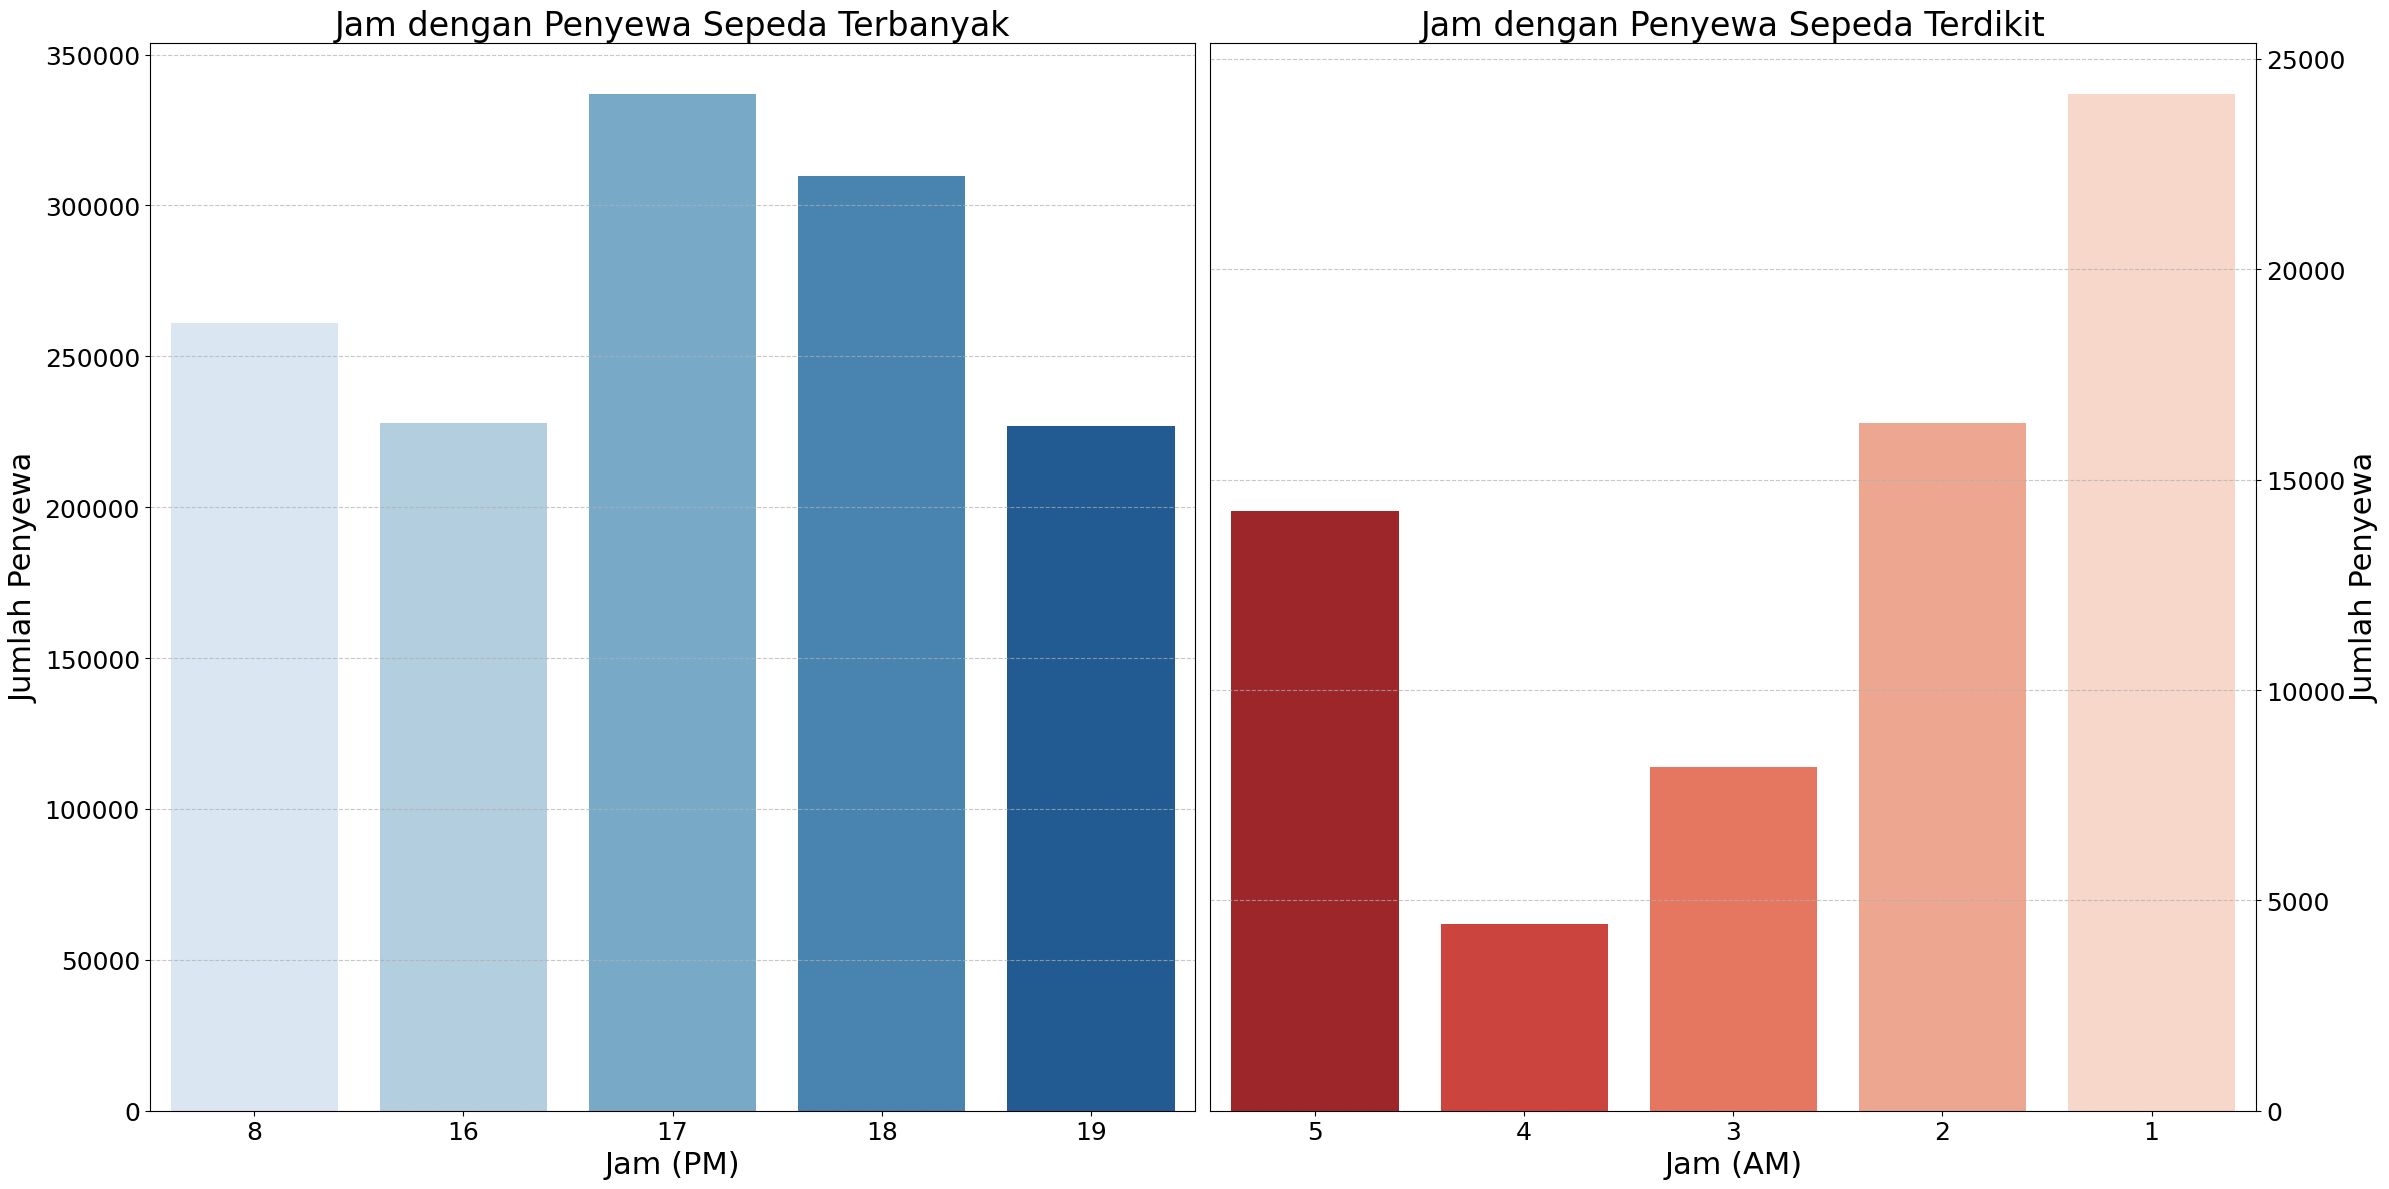

In [27]:
# Membuat figur dan sumbu dengan dua subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))

# Membuat barplot untuk penyewa sepeda terbanyak
top_rentals = sum_order_items_df.head(5)
sns.barplot(x="hours", y="count_cr", data=top_rentals, palette="Blues", ax=ax[0])

# Mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel("Jumlah Penyewa", fontsize=22)
ax[0].set_xlabel("Jam (PM)", fontsize=22)
ax[0].set_title("Jam dengan Penyewa Sepeda Terbanyak", loc="center", fontsize=24)
ax[0].tick_params(axis='y', labelsize=18)
ax[0].tick_params(axis='x', labelsize=18)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Membuat barplot untuk penyewa sepeda terdikit
least_rentals = sum_order_items_df.sort_values(by="count_cr").head(5)
sns.barplot(x="hours", y="count_cr", data=least_rentals, palette="Reds", ax=ax[1])

# Mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel("Jumlah Penyewa", fontsize=22)
ax[1].set_xlabel("Jam (AM)", fontsize=22)
ax[1].set_title("Jam dengan Penyewa Sepeda Terdikit", loc="center", fontsize=24)
ax[1].invert_xaxis()  # Membalik sumbu x
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=18)
ax[1].tick_params(axis='x', labelsize=18)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()  # Mengatur layout agar lebih rapi
plt.show()

## **Pertanyaan 2 :** <br>

###**Pada jam berapakah penyewaan sepeda mencapai jumlah tertinggi dan terendah ?**

C:\Users\user\AppData\Local\Temp\ipykernel_18252\4289278649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


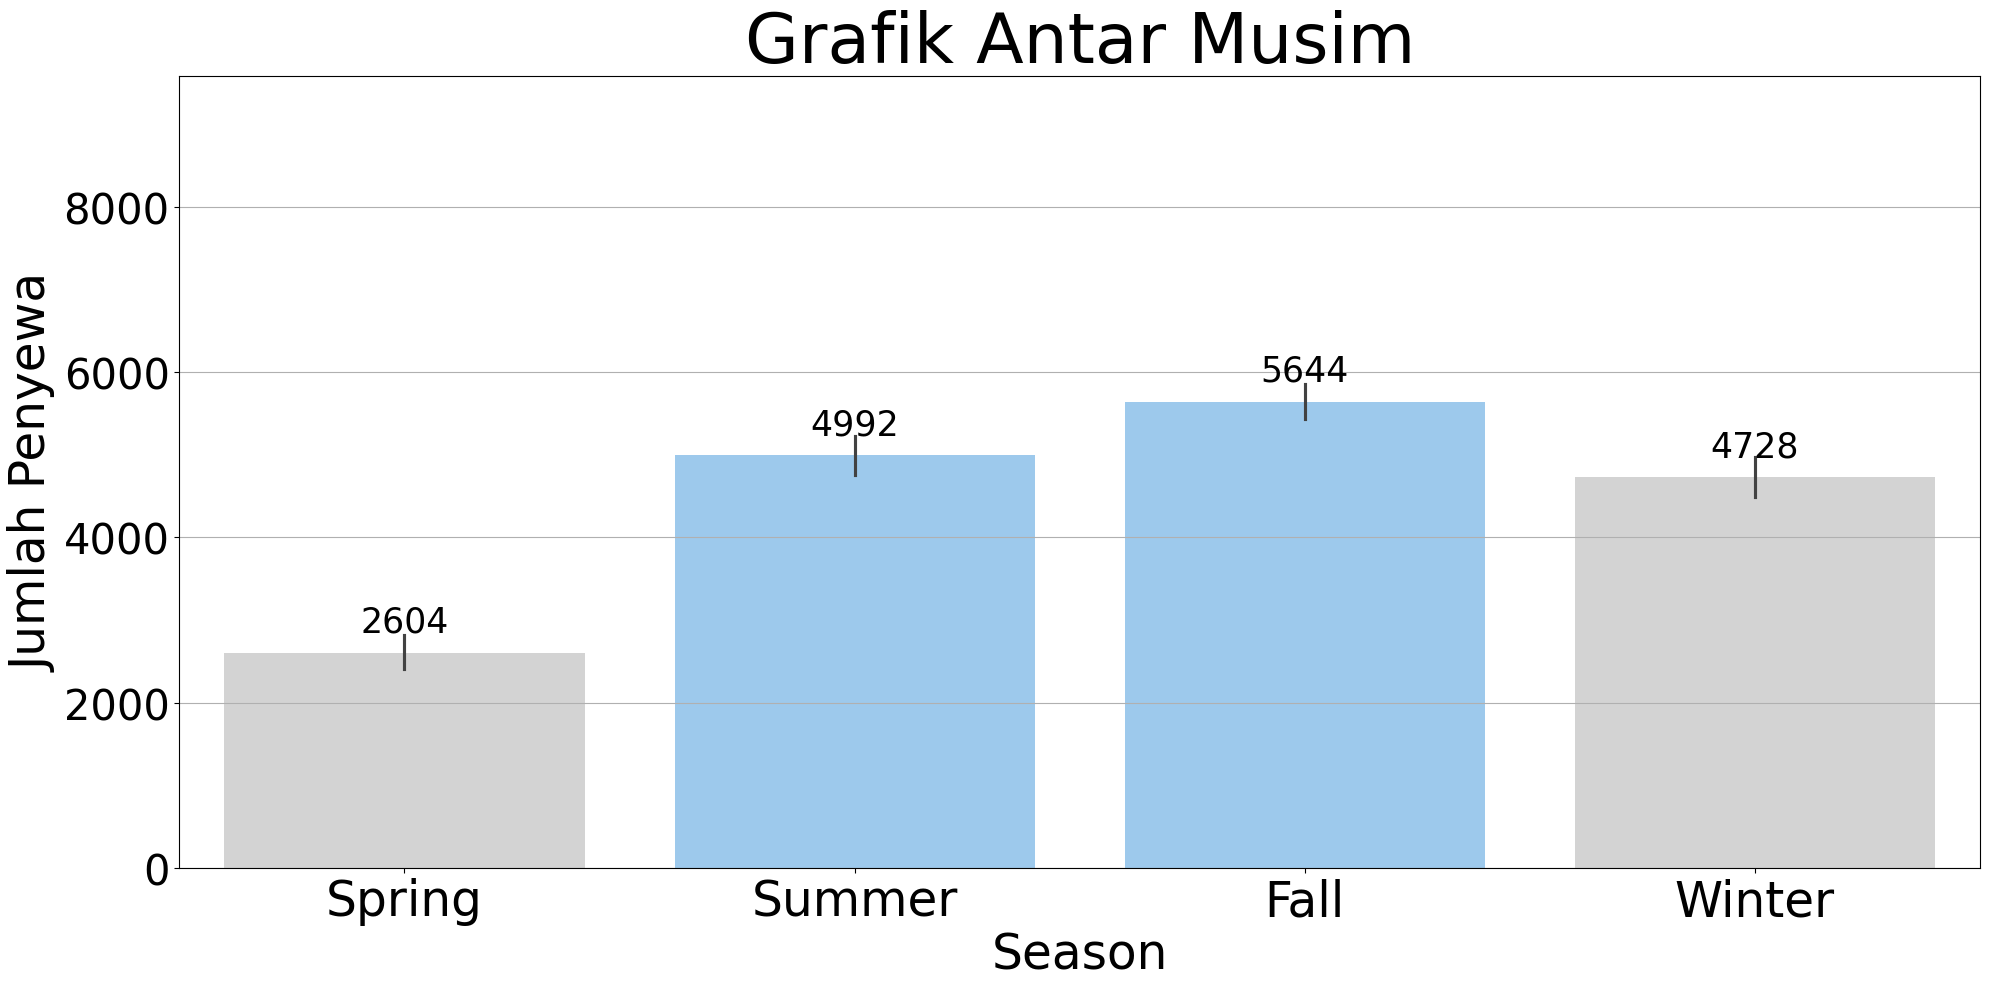

In [28]:
# Mengatur warna
colors = ["#D3D3D3", "#90CAF9", "#90CAF9", "#D3D3D3"]

# Membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="count_cr" dan x="season", menggunakan data=day_df
barplot = sns.barplot(
    y="count_cr",
    x="season",
    data=day_df.sort_values(by="season", ascending=False),
    palette=colors,
    ax=ax
)

# Menambahkan label pada setiap bar
for p in barplot.patches:
    barplot.annotate(format(int(p.get_height())),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=25, color='black',
                      xytext=(0, 10),
                      textcoords='offset points')

# Mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel("Jumlah Penyewa", fontsize=35)
ax.set_xlabel("Season", fontsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# Menambahkan grid
ax.yaxis.grid(True)

# Menyesuaikan batas sumbu y
ax.set_ylim(0, day_df['count_cr'].max() * 1.1)

# Menampilkan plot
plt.tight_layout()
plt.show()

>**Note :** Musim yang paling tinggi tingkat penyewaannya adalah musim gugur, di mana total penyewaan mencapai 1.061.129. Angka ini menunjukkan bahwa banyak orang memilih untuk menyewa selama periode ini, menjadikannya sebagai musim yang paling populer untuk aktivitas penyewaan.

##**Pertanyaan 3 :** <br>
**Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir ?**

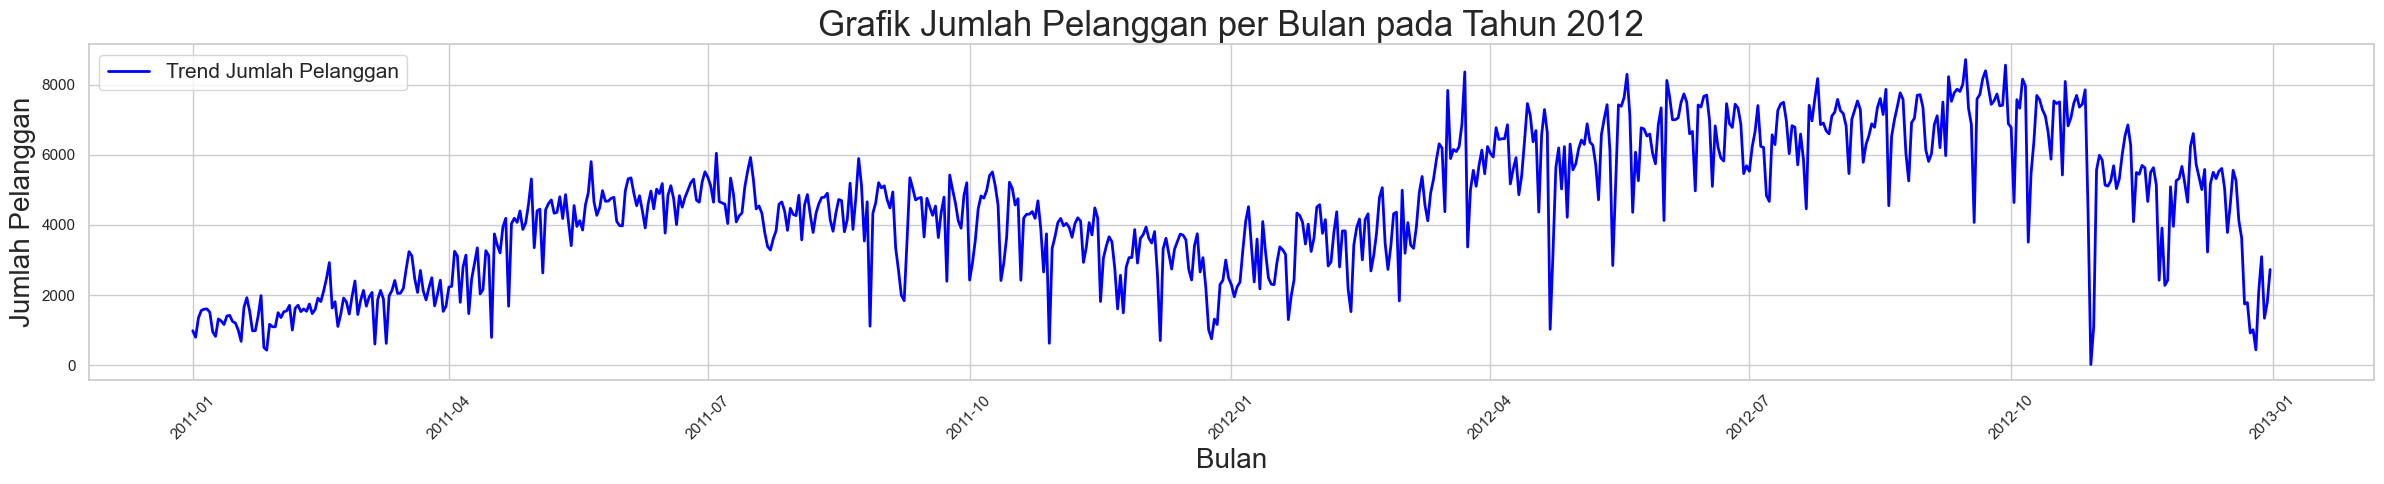

In [29]:
# Mengatur gaya Seaborn
sns.set(style="whitegrid")

# Membuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

# Menghitung jumlah pelanggan maksimum per bulan
monthly_counts = day_df['count_cr'].groupby(day_df['dteday']).max()

# Membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values, color='blue', linewidth=2, label='Trend Jumlah Pelanggan')

# Menambahkan grid
plt.grid(True)

# Menambahkan penamaan untuk sumbu x dan y
plt.xlabel('Bulan', fontsize=20)
plt.ylabel('Jumlah Pelanggan', fontsize=20)

# Menambahkan judul
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2012', fontsize=25)

# Mengatur format tanggal untuk sumbu x
plt.xticks(rotation=45)  # Memutar label sumbu x untuk keterbacaan
plt.tight_layout()  # Menyesuaikan layout

# Menambahkan legenda
plt.legend(fontsize=15)

# Menampilkan plot
plt.show()

> **Note :** Dari visualisasi yang ditampilkan, terlihat jelas bahwa bulan September mencatatkan jumlah pesanan tertinggi. Selain itu, terdapat penurunan yang cukup mencolok dalam jumlah pesanan pada bulan November dan Desember. Hal ini mungkin menunjukkan bahwa aktivitas sewa cenderung menurun menjelang akhir tahun, yang bisa disebabkan oleh berbagai faktor, seperti musim liburan atau perubahan pola permintaan dari pelanggan. Analisis ini memberikan wawasan penting bagi pengelola untuk memahami tren musiman dalam perilaku pelanggan dan merencanakan strategi yang lebih efektif untuk meningkatkan penjualan di bulan-bulan yang lebih sepi.

##**Pertanyaan 4 :** <br>
**Berapa banyak orang yang memilih menjadi pelanggan terdaftar dibandingkan dengan pengguna kasual ?**

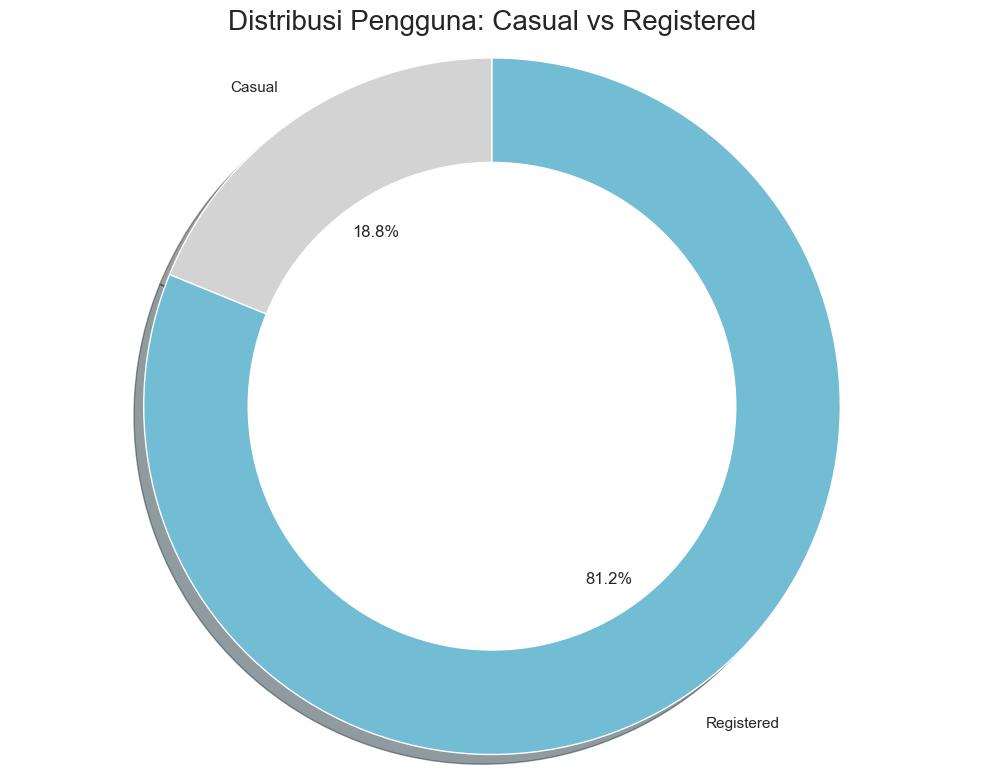

In [30]:
# Menghitung total casual dan registered
total_casual = sum(day_df['casual'])
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot dengan tambahan elemen
plt.figure(figsize=(10, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"], startangle=90, shadow=True)

# Menambahkan lingkaran putih di tengah untuk membuatnya terlihat seperti donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Menambahkan judul
plt.title('Distribusi Pengguna: Casual vs Registered', fontsize=20)

# Menampilkan pie plot
plt.axis('equal')  # Menjaga proporsi lingkaran
plt.tight_layout()  # Menyesuaikan layout
plt.show()

> **Note :** Sebanyak 81,2% pengguna telah melakukan pendaftaran, sementara 18,8% sisanya masih tergolong sebagai pengguna casual yang belum melakukan pendaftaran. Angka ini menunjukkan bahwa mayoritas pengguna telah mengambil langkah untuk mendaftar, yang bisa mengindikasikan minat dan komitmen yang lebih tinggi terhadap layanan yang ditawarkan. Di sisi lain, proporsi pengguna casual yang relatif kecil dapat memberikan peluang bagi perusahaan untuk meningkatkan upaya pemasaran dan promosi, guna mendorong lebih banyak pengguna untuk melakukan pendaftaran dan mendapatkan manfaat tambahan dari layanan yang disediakan.

## **Bonus** <br>
##**Menerapkan teknik analisis lanjutan**

### **Analisis Clustering**

#### **Total Pengguna Berdasarkan weather_situation**

In [31]:
hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_18252\2433479576.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)


weather_situation
Clear             848
Misty             649
Light_rainsnow    368
Heavy_rainsnow      3
Name: count_cr, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_18252\394022886.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = hour_df.groupby("weather_situation")['count_cr'].nunique().sort_values(ascending=False)
C:\Users\user\AppData\Local\Temp\ipykernel_18252\394022886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='viridis')


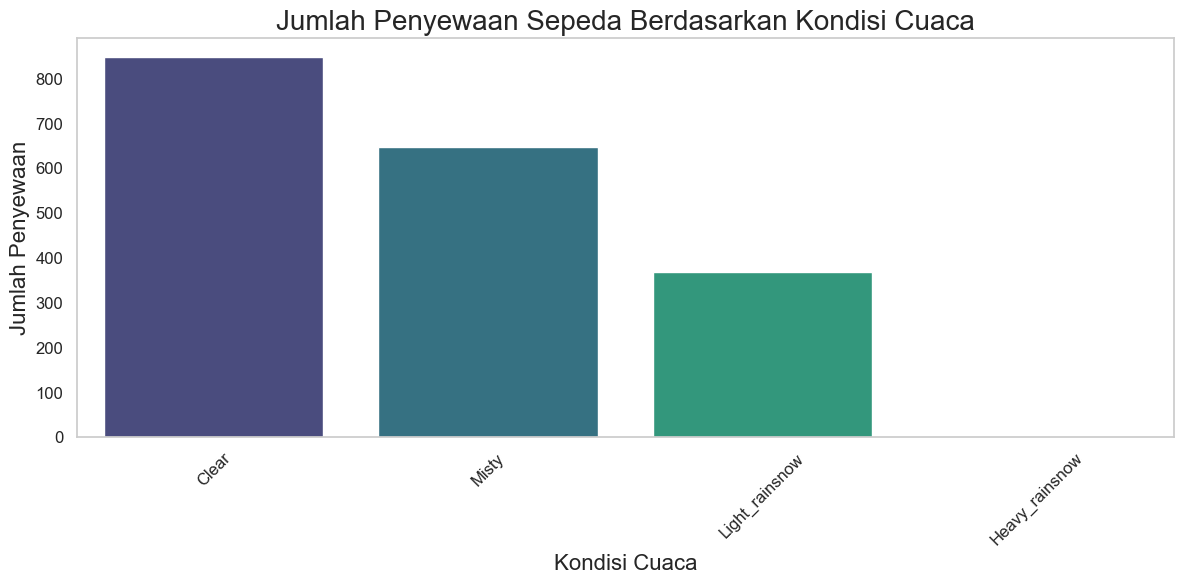

In [32]:
# Menghitung jumlah unik dari count_cr berdasarkan weather_situation
weather_counts = hour_df.groupby("weather_situation")['count_cr'].nunique().sort_values(ascending=False)

# Membuat figure dengan ukuran yang sesuai
plt.figure(figsize=(12, 6))

# Membuat bar plot
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='viridis')

# Menambahkan penamaan untuk sumbu x dan y
plt.xlabel('Kondisi Cuaca', fontsize=16)
plt.ylabel('Jumlah Penyewaan', fontsize=16)

# Menambahkan judul
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=20)

# Mengatur ukuran label sumbu
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan grid
plt.grid(axis='y')

# Menampilkan plot
plt.tight_layout()  # Menyesuaikan layout
plt.show()

> **Note :** Hasil dari visualisasi data diatas menunjukkan bahwa kondisi cuaca berpengaruh signifikan terhadap perilaku penyewa sepeda. Cuaca cerah menarik 848 penyewa, sementara kabut menarik 649 penyewa. Namun, jumlah penyewa menurun drastis pada kondisi hujan ringan salju (368 penyewa) dan hujan salju berat (3 penyewa). Hal ini menunjukkan bahwa cuaca buruk, terutama yang ekstrem, cenderung menghalangi aktivitas luar ruangan.

#### **Total Pengguna Berdasarkan Humidity (Kelembaban)**

In [33]:
hour_df.groupby(by="humidity_category").agg({
    "count_cr": ["count"]})

,count_cr
,count
humidity_category,
Ideal,5505
Terlalu Lembab,8356
Terlalu kering,3518


C:\Users\user\AppData\Local\Temp\ipykernel_18252\1934441095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Humidity Category', y='Number of Renters', data=humidity_counts, palette='Blues')


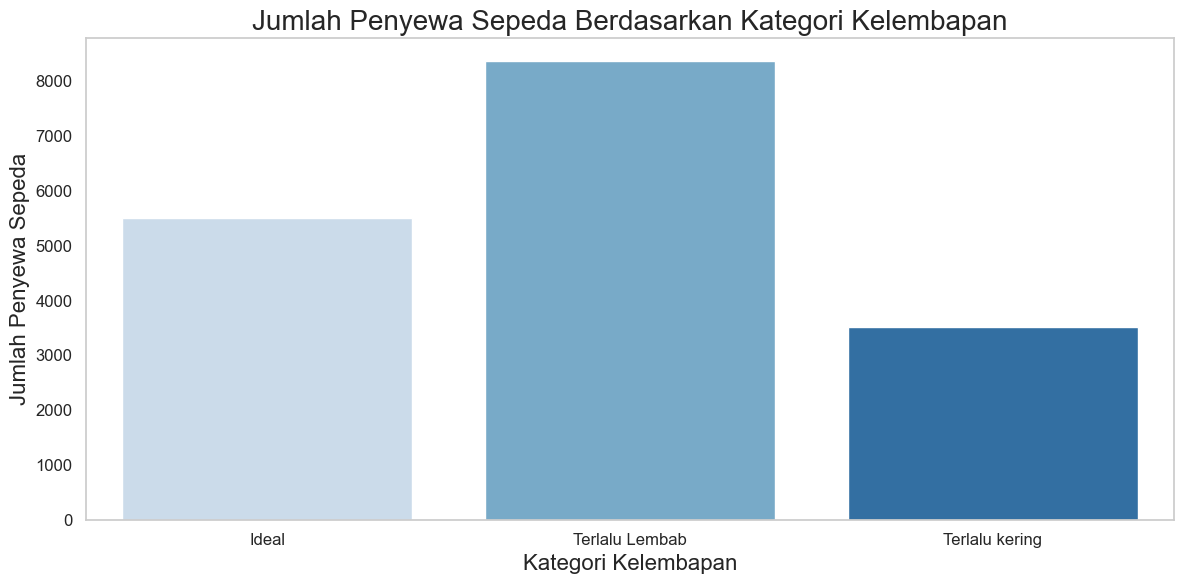

In [34]:
# Menghitung jumlah penyewa sepeda berdasarkan kategori kelembapan
humidity_counts = hour_df.groupby(by="humidity_category").agg({
    "count_cr": "count"
}).reset_index()

# Mengganti nama kolom agar lebih mudah dibaca
humidity_counts.columns = ['Humidity Category', 'Number of Renters']

# Membuat figure dengan ukuran yang sesuai
plt.figure(figsize=(12, 6))

sns.barplot(x='Humidity Category', y='Number of Renters', data=humidity_counts, palette='Blues')

plt.xlabel('Kategori Kelembapan', fontsize=16)
plt.ylabel('Jumlah Penyewa Sepeda', fontsize=16)

plt.title('Jumlah Penyewa Sepeda Berdasarkan Kategori Kelembapan', fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y')

plt.tight_layout()
plt.show()

> **Note :** Dari Visualisasi diatas menunjukkan bahwa kategori kelembapan mempengaruhi perilaku penyewa sepeda. Kategori Ideal mencatat 5.505 penyewa, mencerminkan kondisi paling sesuai untuk bersepeda, sedangkan Terlalu Lembab memiliki jumlah tertinggi, yaitu 8.356 penyewa, meskipun kurang ideal. Sebaliknya, kategori Terlalu Kering mencatat jumlah terendah dengan 3.518 penyewa, menunjukkan bahwa kondisi ini kurang menarik bagi pengguna.

## **RFM Analysis**

Analisis RFM berikut ini digunakan untuk memahami perilaku pelanggan melalui tiga faktor utama yang menggambarkan keterlibatan mereka dengan bisnis:
- **Recency**: Mengukur seberapa baru terakhir kali pelanggan berinteraksi dengan bisnis, yang menunjukkan tingkat kedekatan mereka saat ini.
- **Frequency**: Menggambarkan seberapa sering pelanggan berinteraksi dengan bisnis dalam periode waktu tertentu, membantu mengidentifikasi pelanggan yang lebih loyal atau aktif.
- **Monetary**: Mengukur jumlah uang yang dihabiskan oleh pelanggan, memberikan gambaran kontribusi finansial setiap pelanggan bagi bisnis. 

Melalui ketiga faktor ini, RFM Analysis memungkinkan bisnis untuk mengelompokkan pelanggan berdasarkan nilai dan keterlibatan mereka, sehingga dapat mendukung strategi pemasaran dan loyalitas yang lebih tepat sasaran.

In [35]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


> **Note :** Berdasarkan data RFM ini, pelanggan dengan ID `registered = 4` menunjukkan nilai kontribusi ekonomi tertinggi (*Monetary* = 1602) dan cukup sering berinteraksi (*Frequency* = 307), meskipun interaksi terakhirnya sudah beberapa hari yang lalu (*Recency* = 3), menjadikannya pelanggan bernilai tinggi yang potensial untuk dipertahankan. Di sisi lain, pelanggan dengan ID `registered = 0` memiliki nilai rendah pada ketiga metrik, menunjukkan interaksi yang jarang dan kontribusi ekonomi yang kecil, sehingga mungkin memerlukan pendekatan khusus untuk meningkatkan keterlibatannya. Pelanggan dengan ID `registered = 1` dan `registered = 3` baru saja melakukan interaksi (*Recency* = 0), dengan frekuensi tinggi dan kontribusi yang signifikan, menunjukkan bahwa mereka adalah pelanggan loyal yang mungkin perlu diprioritaskan untuk mempertahankan hubungan jangka panjang.